<a href="https://colab.research.google.com/github/kkokay07/VER/blob/main/codes_VER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

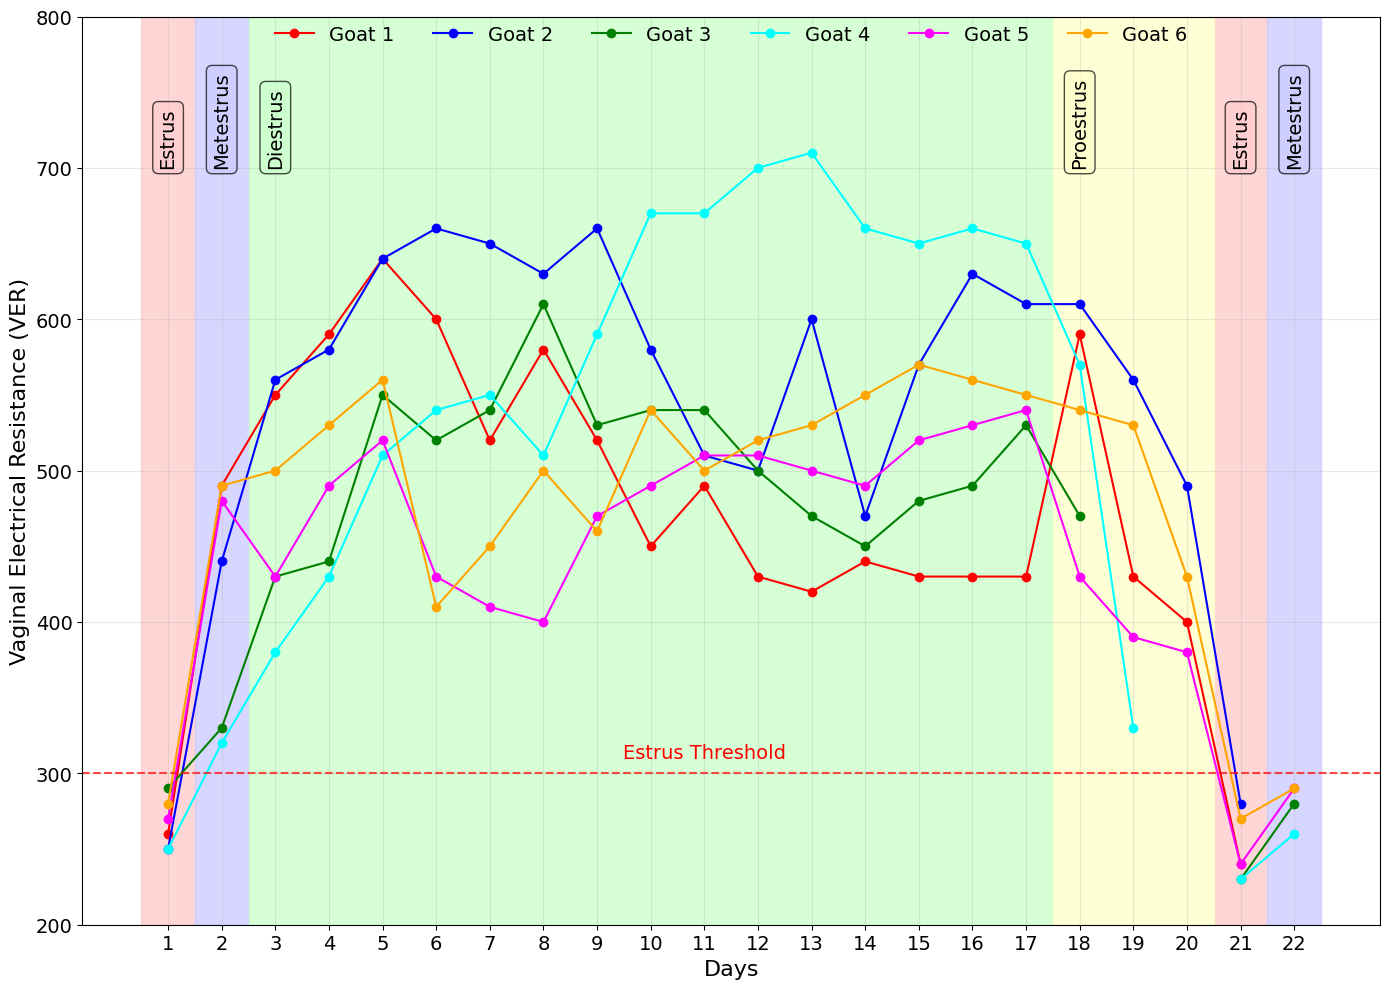

AttributeError: 'DataFrame' object has no attribute 'append'

In [1]:
# Line diagram
# Cell 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Cell 2: Define the data
# Parse the data
data = """Goat	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22
7	260	490	550	590	640	600	520	580	520	450	490	430	420	440	430	430	430	590	430	400	240
14	250	440	560	580	640	660	650	630	660	580	510	500	600	470	570	630	610	610	560	490	280
20	290	330	430	440	550	520	540	610	530	540	540	500	470	450	480	490	530	470			230	280
11	250	320	380	430	510	540	550	510	590	670	670	700	710	660	650	660	650	570	330		230	260
10	270	480	430	490	520	430	410	400	470	490	510	510	500	490	520	530	540	430	390	380	240	290
18	280	490	500	530	560	410	450	500	460	540	500	520	530	550	570	560	550	540	530	430	270	290"""

# Cell 3: Data preparation
# Convert the text data to a DataFrame
lines = data.strip().split('\n')
headers = lines[0].split('\t')
rows = [line.split('\t') for line in lines[1:]]

# Create DataFrame and convert to numeric values
df = pd.DataFrame(rows)
df.columns = headers

# Replace empty strings with NaN
df = df.replace('', np.nan)

# Convert to numeric, except the Goat column
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col])

# Cell 4: Relabel goats
# Rename the goats from 1 to 6
goat_mapping = {
    '7': 'Goat 1',
    '14': 'Goat 2',
    '20': 'Goat 3',
    '11': 'Goat 4',
    '10': 'Goat 5',
    '18': 'Goat 6'
}
df['Goat'] = df['Goat'].map(goat_mapping)

# Display the first few rows of the processed data
df.head()

# Cell 5: Define visualization parameters
# Define colors for each goat
colors = {
    'Goat 1': 'red',
    'Goat 2': 'blue',
    'Goat 3': 'green',
    'Goat 4': 'cyan',
    'Goat 5': 'magenta',
    'Goat 6': 'orange'
}

# Define the estrous cycle phases
phases = {
    'Estrus': [1, 21],
    'Metestrus': [2, 22],
    'Diestrus': list(range(3, 18)),
    'Proestrus': list(range(18, 21))
}

# Define colors for each phase
phase_colors = {
    'Estrus': '#ffcccc',       # Light red
    'Metestrus': '#ccccff',    # Light blue
    'Diestrus': '#ccffcc',     # Light green
    'Proestrus': '#ffffcc'     # Light yellow
}

# Cell 6: Create the visualization
# Create a figure with larger size
plt.figure(figsize=(14, 10))

# Add background colors for each phase
for phase, days in phases.items():
    color = phase_colors[phase]
    if len(days) == 1:
        plt.axvspan(days[0]-0.5, days[0]+0.5, alpha=0.8, color=color)
    elif len(days) == 2 and days[0] != days[1]:
        plt.axvspan(days[0]-0.5, days[0]+0.5, alpha=0.8, color=color)
        plt.axvspan(days[1]-0.5, days[1]+0.5, alpha=0.8, color=color)
    else:
        plt.axvspan(min(days)-0.5, max(days)+0.5, alpha=0.8, color=color)

# Plot the data for each goat
for index, row in df.iterrows():
    goat = row['Goat']
    values = row[1:].astype(float)
    days = np.arange(1, len(values) + 1)
    plt.plot(days, values, marker='o', linestyle='-', color=colors[goat], label=goat)

# Add threshold line
plt.axhline(y=300, color='red', linestyle='--', alpha=0.7)
plt.text(11, 310, 'Estrus Threshold', color='red', fontsize=14, ha='center')

# Cell 7: Format and customize the chart
# Customize the chart
plt.xlabel('Days', fontsize=16)
plt.ylabel('Vaginal Electrical Resistance (VER)', fontsize=16)
# No title

plt.xticks(range(1, 23), fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, alpha=0.3)

# Set y-axis limit
plt.ylim(200, 800)

# Move legend to just above the plot boundary without a frame
plt.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.5, 1.01),
          ncol=6, frameon=False)

# Cell 8: Add phase labels
# Create placement for phase labels at the top - all at the same level
y_pos = 700  # All labels will be at this height
phase_positions = {
    'Estrus': [1, 21],
    'Metestrus': [2, 22],
    'Diestrus': 3,  # start of diestrus period
    'Proestrus': 18  # start of proestrus period
}

# Add vertical labels for all phases
plt.text(phase_positions['Estrus'][0], y_pos, 'Estrus', rotation=90, ha='center', va='bottom', fontsize=14,
         bbox=dict(boxstyle="round,pad=0.3", facecolor=phase_colors['Estrus'], alpha=0.7))
plt.text(phase_positions['Estrus'][1], y_pos, 'Estrus', rotation=90, ha='center', va='bottom', fontsize=14,
         bbox=dict(boxstyle="round,pad=0.3", facecolor=phase_colors['Estrus'], alpha=0.7))
plt.text(phase_positions['Metestrus'][0], y_pos, 'Metestrus', rotation=90, ha='center', va='bottom', fontsize=14,
         bbox=dict(boxstyle="round,pad=0.3", facecolor=phase_colors['Metestrus'], alpha=0.7))
plt.text(phase_positions['Metestrus'][1], y_pos, 'Metestrus', rotation=90, ha='center', va='bottom', fontsize=14,
         bbox=dict(boxstyle="round,pad=0.3", facecolor=phase_colors['Metestrus'], alpha=0.7))
plt.text(phase_positions['Diestrus'], y_pos, 'Diestrus', rotation=90, ha='center', va='bottom', fontsize=14,
         bbox=dict(boxstyle="round,pad=0.3", facecolor=phase_colors['Diestrus'], alpha=0.7))
plt.text(phase_positions['Proestrus'], y_pos, 'Proestrus', rotation=90, ha='center', va='bottom', fontsize=14,
         bbox=dict(boxstyle="round,pad=0.3", facecolor=phase_colors['Proestrus'], alpha=0.7))

# Adjust the layout
plt.tight_layout()

# Cell 9: Display and save the visualization
# Save the figure
plt.savefig('goat_ver_trends.png', dpi=600, bbox_inches='tight')

# Display in notebook
plt.show()

# Cell 10: Additional data analysis (optional)
# Calculate average VER by estrous phase for each goat
phase_days = {
    'Estrus': [1, 21],
    'Metestrus': [2, 22],
    'Diestrus': list(range(3, 18)),
    'Proestrus': list(range(18, 21))
}

# Create a function to get phase for a given day
def get_phase(day):
    for phase, days in phase_days.items():
        if day in days:
            return phase
    return None

# Create a new dataframe for analysis
analysis_df = pd.DataFrame()

# For each goat and phase, calculate average VER
for goat in df['Goat'].unique():
    goat_data = df[df['Goat'] == goat]

    for phase, days in phase_days.items():
        phase_values = []
        for day in days:
            if str(day) in goat_data.columns:
                value = goat_data[str(day)].values[0]
                if not pd.isna(value):
                    phase_values.append(value)

        if phase_values:
            avg_ver = np.mean(phase_values)
            analysis_df = analysis_df.append({
                'Goat': goat,
                'Phase': phase,
                'Average VER': avg_ver
            }, ignore_index=True)

# Display the analysis results
print("Average VER by Estrous Phase:")
analysis_df

In [ ]:
# Violin plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
phases = ['Estrus', 'Metestrus', 'Metestrus', 'Metestrus', 'Metestrus', 'Metestrus',
          'Diestrus', 'Diestrus', 'Diestrus', 'Diestrus', 'Diestrus', 'Diestrus',
          'Diestrus', 'Diestrus', 'Diestrus', 'Diestrus', 'Diestrus',
          'Proestrus', 'Proestrus', 'Proestrus', 'Estrus', 'Estrus']

# Create lists for each goat's measurements
goat1 = [260, 490, 550, 590, 640, 600, 520, 580, 520, 450, 490, 430, 420, 440, 430, 430, 430, 590, 430, 400, 240, 250]
goat2 = [250, 440, 560, 580, 640, 660, 650, 630, 660, 580, 510, 500, 600, 470, 570, 630, 610, 610, 560, 490, 280, 290]
goat3 = [290, 330, 430, 440, 550, 520, 540, 610, 530, 540, 540, 500, 470, 450, 480, 490, 530, 440, 230, 280, None, None]
goat4 = [250, 320, 380, 430, 510, 540, 550, 510, 590, 670, 670, 700, 710, 660, 650, 660, 650, 570, 330, 230, 260, None]
goat5 = [270, 480, 430, 490, 520, 430, 410, 400, 470, 490, 510, 510, 500, 490, 520, 530, 540, 430, 390, 380, 240, 290]
goat6 = [280, 490, 500, 530, 560, 410, 450, 500, 460, 540, 500, 520, 530, 550, 570, 560, 550, 540, 530, 430, 270, 290]

# Create a list of all measurements and phases
values = []
phase_labels = []
for goat_data in [goat1, goat2, goat3, goat4, goat5, goat6]:
    for val, phase in zip(goat_data, phases):
        if val is not None:
            values.append(val)
            phase_labels.append(phase)

# Create DataFrame
df = pd.DataFrame({
    'Phase': phase_labels,
    'Value': values
})

# Set the style and figure size
plt.style.use('seaborn')
plt.figure(figsize=(12, 8), dpi=600)

# Create violin plot
ax = sns.violinplot(data=df, x='Phase', y='Value', order=['Estrus', 'Metestrus', 'Diestrus', 'Proestrus'])

# Customize the plot - no title as requested
plt.xlabel('Phase', fontsize=16)
plt.ylabel('VER Level', fontsize=16)

# Set x and y axis tick font sizes to 15
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

# Add dark outlines to violin plots
for violin in ax.collections:
    violin.set_edgecolor('black')
    violin.set_linewidth(1.5)

# Adjust layout
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('ver_distribution.png', dpi=600, bbox_inches='tight')

# Show plot
plt.show()

In [ ]:
# Phase transition plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the data
data = {
    'Days': range(1, 23),
    'Goat 1': [260,490,550,590,640,600,520,580,520,450,490,430,420,440,430,430,430,590,430,400,420,240],
    'Goat 2': [250,440,560,580,640,660,650,630,660,580,510,500,600,470,570,630,610,610,560,490,280,370],
    'Goat 3': [290,330,430,440,550,520,540,610,530,540,540,500,470,450,480,490,530,470,230,280,340,390],
    'Goat 4': [250,320,380,430,510,540,550,510,590,670,670,700,710,660,650,660,650,570,330,230,260,290],
    'Goat 5': [280,490,500,530,560,410,450,500,460,540,500,520,530,550,570,560,550,540,530,430,270,290],
    'Goat 6': [270,480,430,490,520,430,410,400,470,490,510,510,500,490,520,530,540,430,390,380,240,290]
}

# Define phases
phases = {
    'Estrus': (1, 1),
    'Metestrus': (2, 6),
    'Diestrus': (7, 17),
    'Proestrus': (18, 20),
    'Estrus': (21, 22)
}

# Calculate phase transitions
def calculate_transitions(data_dict):
    df = pd.DataFrame(data_dict)
    transitions = []
    labels = []

    phase_sequence = ['Estrus', 'Metestrus', 'Diestrus', 'Proestrus', 'Estrus']

    for i in range(len(phase_sequence)-1):
        current_phase = phase_sequence[i]
        next_phase = phase_sequence[i+1]

        current_end = phases[current_phase][1]
        next_start = phases[next_phase][0]

        transition_values = []
        for goat in df.columns[1:]:
            current_value = df[goat][current_end-1]
            next_value = df[goat][next_start-1]
            transition_values.append(next_value - current_value)

        transitions.append(transition_values)
        labels.append(f'{current_phase}\nto\n{next_phase}')

    return transitions, labels

# Set style and figure size
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))

# Calculate transitions
transitions, labels = calculate_transitions(data)

# Create box plot
bp = plt.boxplot(transitions,
                 patch_artist=True,  # Fill boxes with color
                 medianprops=dict(color="red", linewidth=2),  # Make median lines red and thicker
                 flierprops=dict(marker='o', markerfacecolor='white', markersize=10),  # Larger outlier points
                 widths=0.7)  # Make boxes slightly narrower

# Customize box colors
for box in bp['boxes']:
    box.set(facecolor='lightblue', alpha=0.7)
    box.set(linewidth=2)

# Customize whiskers
for whisker in bp['whiskers']:
    whisker.set(linewidth=2)

# Customize caps
for cap in bp['caps']:
    cap.set(linewidth=2)

# Add grid
plt.grid(True, linestyle='--', alpha=0.3)

# Customize plot - increase font sizes to 16+
plt.title('Phase Transition Analysis in Estrus Cycle', fontsize=22, pad=20)
plt.ylabel('Change in Electrical Resistance (VER)', fontsize=18)

# Set y-axis limit with more space at bottom for labels
plt.ylim(plt.ylim()[0] - 50, plt.ylim()[1])

# Customize x-axis with larger font
plt.xticks(range(1, len(labels) + 1), labels, fontsize=16)

# Increased y-tick font size
plt.yticks(fontsize=16)

# Add mean values annotations with larger font
for i, d in enumerate(transitions):
    mean_val = np.mean(d)
    plt.text(i+1, plt.ylim()[0] + 20, f'Mean: {mean_val:.1f}',
             horizontalalignment='center',
             verticalalignment='bottom',
             fontsize=16,  # Increased from 12
             fontweight='bold')

# Add subtle background color to alternate transitions
for i in range(len(transitions)):
    if i % 2 == 0:
        plt.axvspan(i+0.5, i+1.5, color='gray', alpha=0.1)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Save the plot with high resolution
plt.savefig('phase_transitions_boxplot.png', dpi=600, bbox_inches='tight')

# Show plot
plt.show()

# Print statistical summary
print("\nTransition Statistics:")
for i, (transition, label) in enumerate(zip(transitions, labels)):
    print(f"\n{label}:")
    print(f"Mean: {np.mean(transition):.2f}")
    print(f"Median: {np.median(transition):.2f}")
    print(f"Std: {np.std(transition):.2f}")
    print(f"Min: {np.min(transition):.2f}")
    print(f"Max: {np.max(transition):.2f}")

In [ ]:
# Radar plot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
from matplotlib.patches import Circle

# Create the dataset and calculate correlations
data = {
    'VER': [260, 250, 270, 250, 280, 290, 240, 240, 290, 290, 280, 370, 290, 230, 280],
    'Cervical_mucus': [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    'Buck_interest': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    'Vulvar_edema': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
}

# Calculate correlations
correlations = {}
for param in ['Cervical_mucus', 'Buck_interest', 'Vulvar_edema']:
    corr, _ = pearsonr(data['VER'], data[param])
    correlations[param] = abs(corr)
correlations['VER'] = 1.0

# Setup plot
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

# Define colors for different ranges
colors = {
    '0-0.3': '#FF6B6B',     # Red
    '0.3-0.6': '#FFD93D',   # Yellow
    '0.6-0.9': '#6BCB77',   # Green
    '0.9-1.0': '#4D96FF'    # Blue
}

# Create colored circles from outside in
circles = [
    (1.0, 0.9, colors['0.9-1.0']),
    (0.9, 0.6, colors['0.6-0.9']),
    (0.6, 0.3, colors['0.3-0.6']),
    (0.3, 0.0, colors['0-0.3'])
]

for outer_r, inner_r, color in circles:
    circle_outer = Circle((0, 0), outer_r, transform=ax.transData._b,
                         color=color, alpha=0.3)
    if inner_r > 0:
        circle_inner = Circle((0, 0), inner_r, transform=ax.transData._b,
                            color='white')
        ax.add_artist(circle_outer)
        ax.add_artist(circle_inner)
    else:
        ax.add_artist(circle_outer)

# Plot data
categories = list(correlations.keys())
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
values = list(correlations.values())
values += values[:1]

# Plot with thicker, darker blue line
ax.plot(angles, values, 'o-', linewidth=3, color='darkblue',
        label='Correlation with VER', zorder=5)  # Higher zorder to show above circles

# Add correlation values with white background - positioned slightly outside the plotted line
for i, value in enumerate(values[:-1]):
    angle = angles[i]
    if value < 1:
        # Calculate position further outward but keep within 1.0 limit
        display_radius = value + 0.09
        ax.text(angle, display_radius, f'{value:.2f}',
                color='darkblue',
                fontsize=16,
                fontweight='bold',
                ha='center', va='center',
                bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', pad=3),
                zorder=6)

# Customize plot
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=16)  # Increased from 12 to 16
ax.set_ylim(0, 1.0)  # Reset to original limit

# Set tick labels further out
ax.tick_params(pad=15)  # Increased padding for tick labels

plt.title('Correlation between VER and Reproductive Parameters',
          pad=20, size=16, fontweight='bold')  # Increased from 14 to 16

# Add legend with larger font
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=16)

# Add gridlines with higher transparency
ax.grid(True, alpha=0.2)

# Save plot
plt.savefig('enhanced_ver_correlation.png', dpi=600, bbox_inches='tight')
plt.close()

In [ ]:
# PCA
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset
data = {
    'VER': [260, 250, 270, 250, 280, 290, 240, 240, 290, 290, 280, 370, 290, 230, 280],
    'Cervical_mucus': [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    'Buck_interest': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    'Vulvar_edema': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate feature loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2', 'PC3', 'PC4'],
    index=df.columns
)

# Set global font size
plt.rcParams.update({'font.size': 16})

# Create figure with subplots
fig = plt.figure(figsize=(15, 12))
gs = plt.GridSpec(2, 2, height_ratios=[1, 1.2])

# 1. Scree plot (a)
ax1 = plt.subplot(gs[0, 0])
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
ax1.set_title('Scree Plot', fontsize=17, pad=15)
ax1.set_xlabel('Principal Component', fontsize=16)
ax1.set_ylabel('Explained Variance Ratio', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.grid(True, alpha=0.3)
# Add (a) label
ax1.text(-0.15, 1.15, '(a)', transform=ax1.transAxes, fontsize=16, fontweight='bold')

# 2. Cumulative variance plot (b)
ax2 = plt.subplot(gs[0, 1])
ax2.plot(range(1, len(explained_variance) + 1),
         np.cumsum(explained_variance), 'ro-')
ax2.set_title('Cumulative Explained Variance', fontsize=17, pad=15)
ax2.set_xlabel('Number of Components', fontsize=16)
ax2.set_ylabel('Cumulative Explained Variance Ratio', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.grid(True, alpha=0.3)
# Add (b) label
ax2.text(-0.15, 1.15, '(b)', transform=ax2.transAxes, fontsize=16, fontweight='bold')

# 3. Feature loadings heatmap (c)
ax3 = plt.subplot(gs[1, 0])
sns.heatmap(loadings, annot=True, cmap='RdBu', center=0,
            fmt='.3f', cbar_kws={'label': 'Loading Strength'}, ax=ax3,
            annot_kws={"size": 16})
ax3.set_title('PCA Feature Loadings', fontsize=17, pad=15)
ax3.tick_params(axis='both', which='major', labelsize=16)
cbar = ax3.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Loading Strength', size=16)
# Add (c) label
ax3.text(-0.15, 1.15, '(c)', transform=ax3.transAxes, fontsize=16, fontweight='bold')

# 4. PC1 vs PC2 biplot (d)
ax4 = plt.subplot(gs[1, 1])
# Plot scatter points
ax4.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', alpha=0.6)
ax4.set_title('PC1 vs PC2 Biplot', fontsize=17, pad=15)
ax4.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', fontsize=16)
ax4.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', fontsize=16)
ax4.tick_params(axis='both', which='major', labelsize=16)

# Add feature vectors
for i, feature in enumerate(df.columns):
    feature_vector = pca.components_[:2, i]
    ax4.arrow(0, 0,
              feature_vector[0],
              feature_vector[1],
              color='red', alpha=0.8, head_width=0.05)
    ax4.text(feature_vector[0]*1.15,
             feature_vector[1]*1.15,
             feature,
             color='red',
             fontsize=16)  # Increased from 10 to 16
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax4.axvline(x=0, color='k', linestyle='--', alpha=0.3)
# Add (d) label
ax4.text(-0.15, 1.15, '(d)', transform=ax4.transAxes, fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Save plot
plt.savefig('comprehensive_pca_analysis.png', dpi=600, bbox_inches='tight')
plt.close()

# Print explained variance
print("\nExplained Variance by Principal Components:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%)")


Explained Variance by Principal Components:
PC1: 0.7006 (70.06%)
PC2: 0.1679 (16.79%)
PC3: 0.1012 (10.12%)
PC4: 0.0303 (3.03%)
